In [1]:
from specialist_data import transformed
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

data = transformed.data.copy()
clf = MLPClassifier(
    hidden_layer_sizes=(64,64,64,64,64),
    alpha=0.000001,
    max_iter=2000,
    activation="tanh",
    verbose=10,
    random_state=42,
    tol=0.000005
)

def evolve_stage(clf, stage, interval=2):
    train_data = data.query(f'index > {stage}000 and index < {stage + interval}000')
    test_data = data.query(f'index > {stage + interval}000 and index < {stage + interval*2}000')
    transformed.set_data(train_data)
    clf = clf.partial_fit(transformed.X, transformed.level, ['bad', 'good'])
    transformed.set_data(test_data)
    return clf.score(transformed.X, transformed.level)
    

/home/arthur/projects/curriculum-learning/models/transform/environmental.py:32: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.level = self.level


Iteration 29, loss = 0.68936502
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 30, loss = 0.71927782
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 31, loss = 0.77192895
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 32, loss = 0.70576017
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 33, loss = 0.67000954
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 34, loss = 0.63107390
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 35, loss = 0.59209399
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 36, loss = 0.60692725
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 37, loss = 0.5

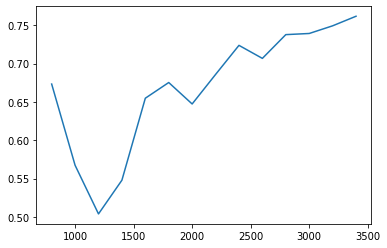

In [4]:
import matplotlib.pyplot as plt

results = []
stages = []
for stg in range(8, 36, 2):
    r = evolve_stage(clf, stg)
    results.append(int(r*100))
    stages.append(stg)

plt.plot(stages, results)
plt.show()